## Problem Statement

-  X Education sells online courses and generates leads through website visits, form submissions, and referrals. Currently, only about 30% of these leads convert into paying customers. To improve this, X Education needs a model to assign lead scores, helping identify which leads are most likely to convert. The goal is to increase the lead conversion rate to around 80% by effectively nurturing promising leads.


## Goals :

- Develop a logistic regression model to assign a lead score between 0 and 100, allowing the company to focus on leads with the highest conversion potential. This scoring system will enhance targeting efforts and improve overall lead conversion rates.
<br>
- Build the model to be flexible enough to adapt to potential changes in the company's requirements in the future, ensuring it can accommodate new factors or metrics as needed.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing and reading data

In [2]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading data
lead= pd.read_csv("C://Users//mahar//Downloads//Lead Scoring Assignment//Leads.csv")

In [4]:
#print the head of the data frame
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Step 2: Inspecting the Dataframe

In [5]:
# checking the dimensions of the dataframe
lead.shape

(9240, 37)

- 9240 rows and 37 columns are present  in our leads dataset.

In [6]:
# checking the type of the variables
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- From above we can see some null missing values are there in our data.

In [7]:
#Checking at the statistical aspects of the dataframe
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Step 3: Data  cleaning 

In [8]:
#Checking the number of missing values in each column

lead.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

In [9]:
lead.head(50)

Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
5   2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7   20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8   cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9   af465dfc-7204-4130-9e05-33231863c4b5       660616   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14  a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16  3abb7c77-1634-4083-9a9f-861068220611       660540   
17  e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18  82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19  4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20  c4419c99-b002-408b-a6fd-fa100716592c       660479   
21  fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22  8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23  ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24  ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25  31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26  c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27  6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28  8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29  b3455e2e-8236-478a-b1aa-666ad3381722       660410   
30  da8c5ce5-52b5-4a4e-bf75-e533d2aca52c       660402   
31  d2055a36-b268-43a0-beeb-9a715f6a660d       660374   
32  c7d82991-3477-40ca-a616-db2d09228a55       660361   
33  5af0914a-fa65-48e1-b11e-b44849206dc3       660339   
34  bc19e116-132c-4e00-a3fa-caa1ddda2f4e       660333   
35  30422ea1-36fe-465e-9e68-41ee190fefb3       660321   
36  a8ecfc52-9988-498a-9a21-df747891b847       660312   
37  e60a54bc-0816-430e-a99a-019a8b5a27e5       660267   
38  e50b7515-b5a5-4691-a450-5e28ba99b472       660255   
39  d6686032-c65e-4495-a0f4-ba7471209356       660236   
40  daebea93-20bd-48be-b89b-85c7711ca0d7       660235   
41  3ec75559-60f8-46f0-9198-bd3d05c464aa       660222   
42  d262e52a-b8e1-4164-b869-bb199ddf75a9       660215   
43  abc432ac-7393-4312-b49f-c43702397416       660203   
44  85195b85-b384-4745-8e50-719566f70f52       660194   
45  fd31b6df-f961-43ba-8e81-618ce5aabfe5       660180   
46  18633077-5162-4cc6-8728-bc25f7a32fd1       660174   
47  3f04fd93-2884-45f6-a4fc-f3b6f234554b       660153   
48  86681269-67b1-4909-90c0-216136535815       660149   
49  319325b3-50b3-45d0-b730-c9df0b30b9ea       660128   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
0                       API      Olark Chat           No          No   
1                       API  Organic Search           No          No   
2   Landing Page Submission  Direct Traffic           No          No   
3   Landing Page Submission  Direct Traffic           No          No   
4   Landing Page Submission          Google           No          No   
5                       API      Olark Chat           No          No   
6   Landing Page Submission          Google           No          No   
7                       API      Olark Chat           No          No   
8   Landing Page Submission  Direct Traffic           No          No   
9                       API          Google           No          No   
10  Landing Page Submission  Organic Search           No          No   
11  Landing Page Submission  Direct Traffic           No          No   
12                      API  Organic Search           No          No   
13  Landing Page Submission  Organic Search           No          No   
14  Landing Page Submission  Direct Traff

- Many columns contain 'Select' values, likely indicating that customers didn’t choose an option. Since 'Select' values functionally represent missing data, we can replace them with null values.

In [10]:
# Converting 'Select' values to NaN.
lead= lead.replace('Select', np.nan)

In [11]:
#Checking
lead.head(50)

Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
5   2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7   20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8   cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9   af465dfc-7204-4130-9e05-33231863c4b5       660616   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14  a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16  3abb7c77-1634-4083-9a9f-861068220611       660540   
17  e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18  82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19  4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20  c4419c99-b002-408b-a6fd-fa100716592c       660479   
21  fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22  8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23  ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24  ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25  31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26  c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27  6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28  8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29  b3455e2e-8236-478a-b1aa-666ad3381722       660410   
30  da8c5ce5-52b5-4a4e-bf75-e533d2aca52c       660402   
31  d2055a36-b268-43a0-beeb-9a715f6a660d       660374   
32  c7d82991-3477-40ca-a616-db2d09228a55       660361   
33  5af0914a-fa65-48e1-b11e-b44849206dc3       660339   
34  bc19e116-132c-4e00-a3fa-caa1ddda2f4e       660333   
35  30422ea1-36fe-465e-9e68-41ee190fefb3       660321   
36  a8ecfc52-9988-498a-9a21-df747891b847       660312   
37  e60a54bc-0816-430e-a99a-019a8b5a27e5       660267   
38  e50b7515-b5a5-4691-a450-5e28ba99b472       660255   
39  d6686032-c65e-4495-a0f4-ba7471209356       660236   
40  daebea93-20bd-48be-b89b-85c7711ca0d7       660235   
41  3ec75559-60f8-46f0-9198-bd3d05c464aa       660222   
42  d262e52a-b8e1-4164-b869-bb199ddf75a9       660215   
43  abc432ac-7393-4312-b49f-c43702397416       660203   
44  85195b85-b384-4745-8e50-719566f70f52       660194   
45  fd31b6df-f961-43ba-8e81-618ce5aabfe5       660180   
46  18633077-5162-4cc6-8728-bc25f7a32fd1       660174   
47  3f04fd93-2884-45f6-a4fc-f3b6f234554b       660153   
48  86681269-67b1-4909-90c0-216136535815       660149   
49  319325b3-50b3-45d0-b730-c9df0b30b9ea       660128   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
0                       API      Olark Chat           No          No   
1                       API  Organic Search           No          No   
2   Landing Page Submission  Direct Traffic           No          No   
3   Landing Page Submission  Direct Traffic           No          No   
4   Landing Page Submission          Google           No          No   
5                       API      Olark Chat           No          No   
6   Landing Page Submission          Google           No          No   
7                       API      Olark Chat           No          No   
8   Landing Page Submission  Direct Traffic           No          No   
9                       API          Google           No          No   
10  Landing Page Submission  Organic Search           No          No   
11  Landing Page Submission  Direct Traffic           No          No   
12                      API  Organic Search           No          No   
13  Landing Page Submission  Organic Search           No          No   
14  Landing Page Submission  Direct Traff

In [12]:
#Again checking the columns for null values
lead.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Number                 

- Many columns have a significant number of missing values, indicating they aren't useful. Since our DataFrame has 9000 data points, we should remove any columns with more than 3500 missing values, as they don’t add much value.

In [13]:
# Droping all the columns in which greater than 3500 missing values are present

for col in lead.columns:
    if lead[col].isnull().sum() > 3500:
        lead.drop(col,axis=1,inplace=True)

In [14]:
#Again checking the columns for null values
lead.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Origin                 

In [15]:
# Checking the null percentages across columns after removing the above columns
round(lead.isnull().sum()/len(lead.index),2)*100 

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

- The Specialization column has 37% missing values, likely because some leads are students, don’t have a specialization, or their specialization isn’t included in the options. To handle this, we can add a new category called 'Others' for these entries.

In [16]:
# Creating a separate category called 'Others' for this 
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Others')

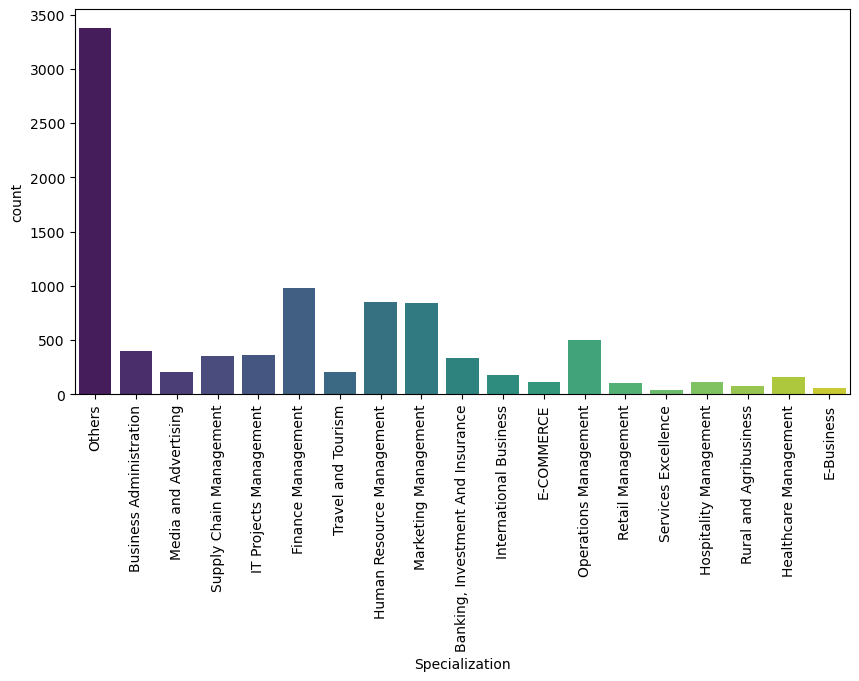

In [17]:
#Visualizing "Specialization" coloumn
plt.figure(figsize=(10, 5))
sns.countplot(x='Specialization', data=lead, palette='viridis')  # You can choose any palette
plt.xticks(rotation=90)
plt.show()

- As we can see above we added another level as "Others"

In [18]:
#Again checking the columns for null values
lead.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Specialization                                      0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                

- 'Specialization'column has 0 null value now.

- "Tag" column has 36% null values.Let's check.

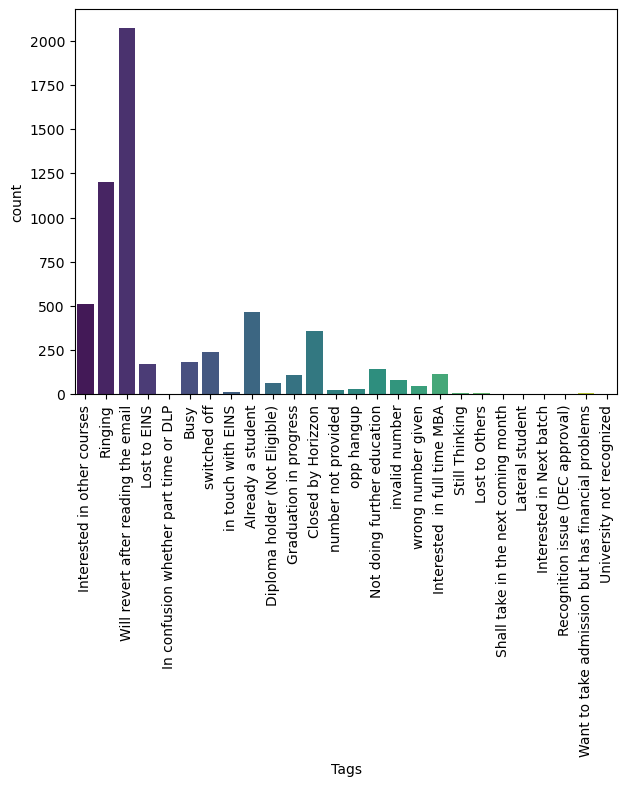

In [19]:
# Visualizing Tags column
plt.figure(figsize=(7,5))
sns.countplot(x='Tags',data=lead, palette='viridis')
plt.xticks(rotation=90)
plt.show()

- As we can see the majority of entries are 'Will revert after reading the email,' we can fill in the missing values in this column with this same value.

In [20]:
# Imputing the null values  in the tags column with 'Will revert after reading the email
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [21]:
#Again checking the columns for null values
lead.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Tags                                                0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Specialization                                      0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

In [22]:
# Checking the null percentages of the columns
round(lead.isnull().sum()/len(lead.index),2)*100 

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

- "What matters most to you in choosing a course" has 29% missing values

([0, 1, 2],
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

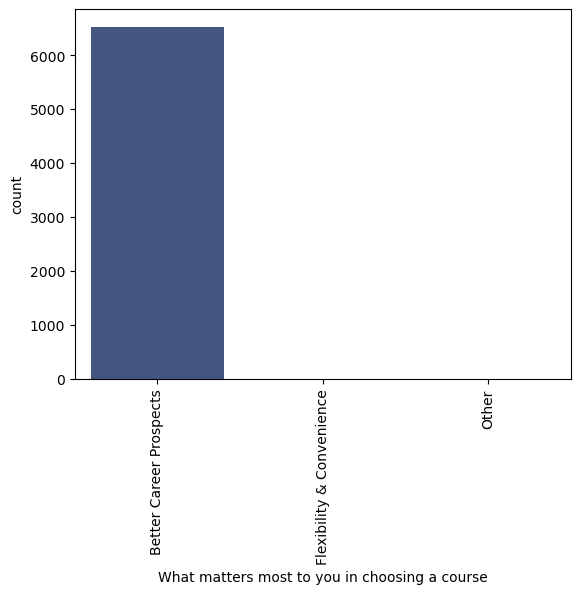

In [23]:
# Visualizing this column
sns.countplot(x='What matters most to you in choosing a course',data=lead, palette='viridis')
plt.xticks(rotation=90)


In [24]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

This is a very highly skewed column we can drop this column.

In [25]:
lead=lead.drop('What matters most to you in choosing a course',axis=1)

In [26]:
# Checking the null percentages of the columns
round(lead.isnull().sum()/len(lead.index),2)*100 

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation             29.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

- "What is your current occupation" has 29% missing values

In [27]:
lead['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

- Maximum(around 85%) fall under Unemployed category

In [28]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unavailable '
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Not provided')

In [29]:
# Checking the null percentages of the columns
round(lead.isnull().sum()/len(lead.index),2)*100 

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

- "Country" column has 27% missing values

In [30]:
lead['Country'].value_counts(normalize=True)

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

- Around 95% fall in India category

In [31]:
# Imputing the missing data in the 'Country' column with 'Not provided'
lead['Country']=lead['Country'].replace(np.nan,'Not provided')

In [32]:
lead['Country'].value_counts()

Country
India                   6492
Not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [33]:
# Let's categorize "Country"
def categorize_country(country):
    
    if country == "India":
        return "India"
    elif country == "Not provided":
        return "Not provided"
    else:
        return "outside india"

lead['Country'] = lead['Country'].map(categorize_country)

In [34]:
lead['Country'].value_counts()

Country
India            6492
Not provided     2461
outside india     287
Name: count, dtype: int64

In [35]:
# Checking the null percentages of the columns
round(lead.isnull().sum()/len(lead.index),2)*100 

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

- We will drop those columns with 1% null values.

In [36]:
# Dropping the rows with null values
lead.dropna(inplace = True)

In [37]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [38]:
# Percentage of rows present
(len(lead.index)/9240)*100

98.2034632034632

- We have 98%  of our data after cleaning the data

In [39]:
lead.shape

(9074, 28)

In [40]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... Newspaper  \
0                            0                   0.0  ...        No   
1                          674                   2.5  ...        No   
2                         1532                   2.0  ...        No   
3                          305                   1.0  ...        No   
4                         1428                   1.0  ...        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 28 columns]

In [41]:
lead['Magazine'].value_counts()

Magazine
No    9074
Name: count, dtype: int64

In [42]:
lead['Newspaper Article'].value_counts()

Newspaper Article
No     9072
Yes       2
Name: count, dtype: int64

In [43]:
lead['X Education Forums'].value_counts()

X Education Forums
No     9073
Yes       1
Name: count, dtype: int64

In [44]:
lead['Digital Advertisement'].value_counts()

Digital Advertisement
No     9070
Yes       4
Name: count, dtype: int64

In [45]:
lead['Through Recommendations'].value_counts()

Through Recommendations
No     9067
Yes       7
Name: count, dtype: int64

In [46]:
lead['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64

In [47]:
lead['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9074
Name: count, dtype: int64

In [48]:
lead['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9074
Name: count, dtype: int64

In [49]:
lead['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64

In [50]:
lead['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9074
Name: count, dtype: int64

In [51]:
lead['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64

In [52]:
lead['Newspaper'].value_counts()

Newspaper
No     9073
Yes       1
Name: count, dtype: int64

- As we can see no information can be drawn from above columns we can drop those columns

In [53]:
lead = lead.drop(['Lead Number','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [54]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Step-4 Exploratory Data Anaysis

#### Univariate and Bivariate Analysis

 **Converted**

- 'Converted' is our taget variable.
- It indicates whether a lead has been successfully converted (1) or not (0)

In [55]:
(sum(lead['Converted'])/len(lead['Converted'].index))*100


37.85541106458012

- The lead covertion is arond 38% .

**Lead Origin**

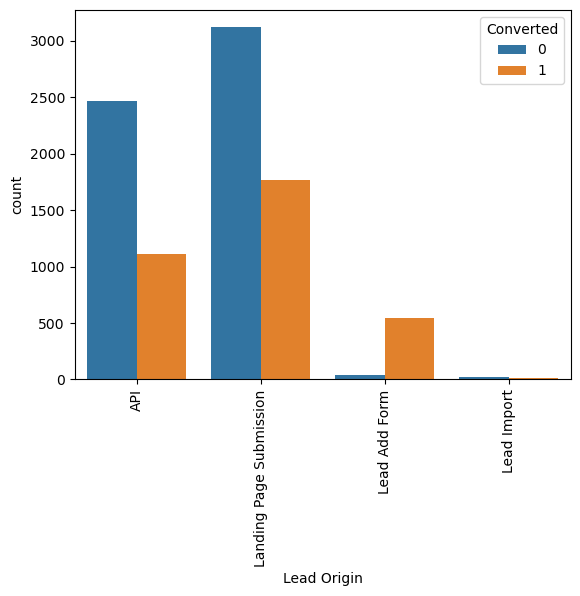

In [56]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- API and Landing page Submission has largernumber of leads and also has considerable amount of conversion rate around 30-40%.
- Lead Add Form  has highest rate of conversion .However, it results in a low number of leads.
- Lead imports have a very small count.

**Lead Source**

In [57]:
lead["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [58]:
# Replacing 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(['google'],'Google')

In [59]:
# Creating a new category 'Others' for some of the Lead Sources column values which do not have much values.

lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [60]:
#Checking values again
lead["Lead Source"].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: count, dtype: int64

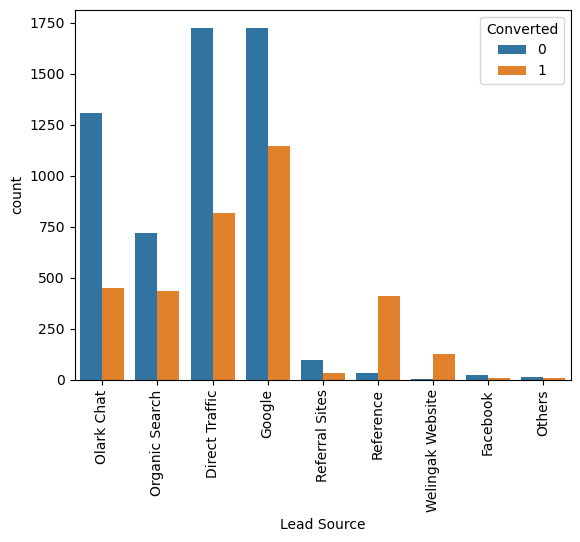

In [61]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- Google and Direct traffic generate the highest number of leads.
- Reference leads have a high conversion rate.
- Leads from the Welingak website also show a high conversion rate but has little less number of leads.

In [62]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

**Do Not Email**

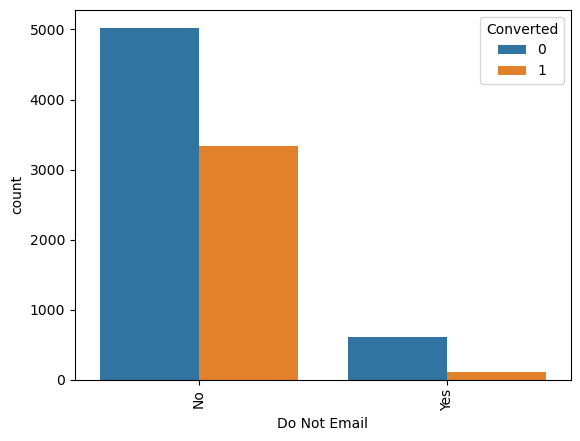

In [63]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- The amount of no is very high than Yes.
- We are not getting any inference from above plot on coversion.

**TotalVisits**

<Axes: ylabel='TotalVisits'>

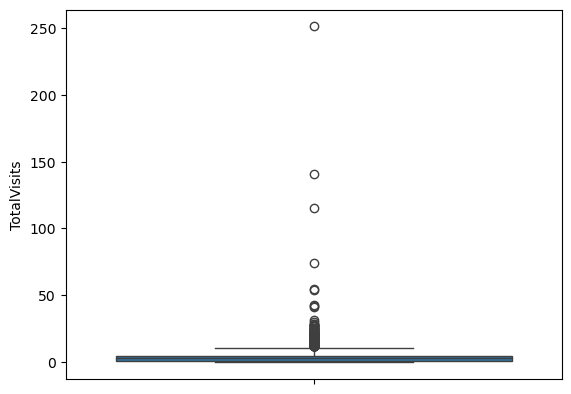

In [64]:
sns.boxplot(lead['TotalVisits'])

In [65]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

- There are several outliers in the data. To improve our analysis, we will cap these outliers at the 95th percentile value.

In [66]:
percentiles = lead['TotalVisits'].quantile([0.05, 0.95]).values
lead['TotalVisits'] = lead['TotalVisits'].clip(percentiles[0], percentiles[1])

In [67]:
lead['TotalVisits'].describe()

count    9074.000000
mean        3.191867
std         2.780618
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='Converted', ylabel='TotalVisits'>

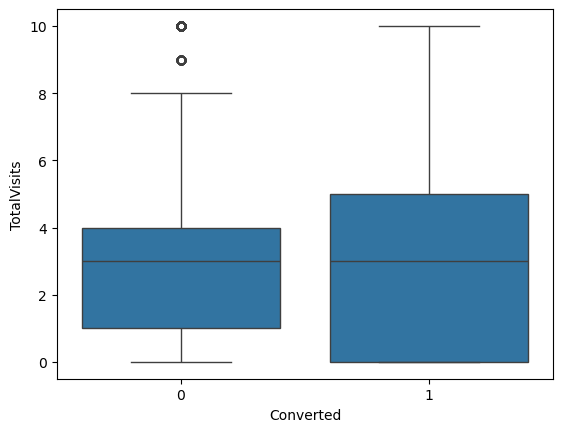

In [68]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

- We can not infer anything from above plot.Only we can see 50% are almost same for converted and not coverted.

**Total Time Spent on Website**

In [69]:
lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

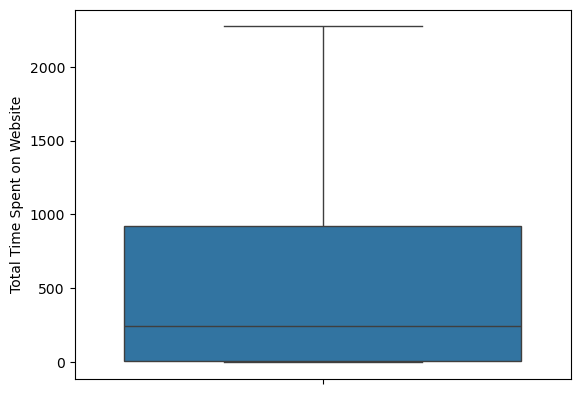

In [70]:
sns.boxplot(y = 'Total Time Spent on Website', data = lead)

- No outlier is present

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

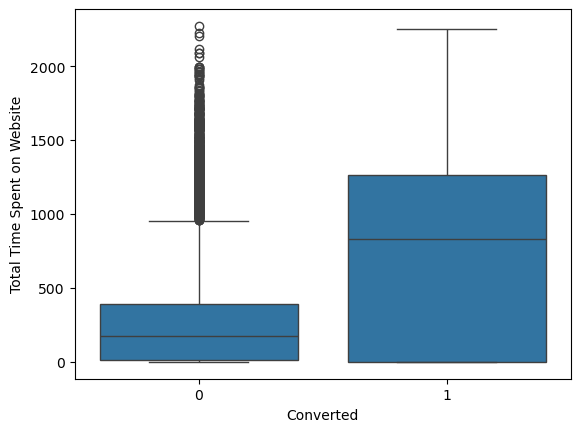

In [71]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)

- Leads who spend more time on the website are more likely to convert.

**Page Views Per Visit**

<Axes: ylabel='Page Views Per Visit'>

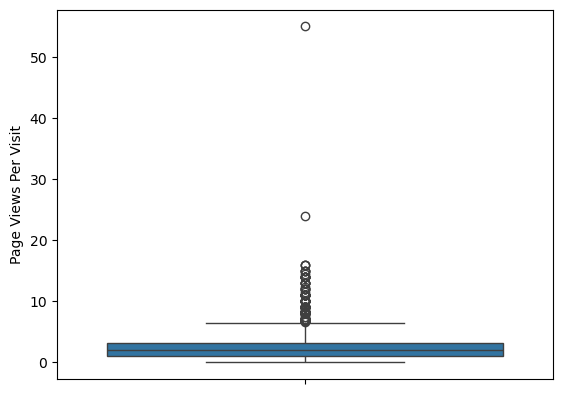

In [72]:
sns.boxplot(lead['Page Views Per Visit'])

- Clearly it has outliers.

In [73]:
lead['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- We will cap the outliers to 95% value for analysis.

In [74]:
percentiles = lead['Page Views Per Visit'].quantile([0.05, 0.95]).values
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].clip(percentiles[0], percentiles[1])

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

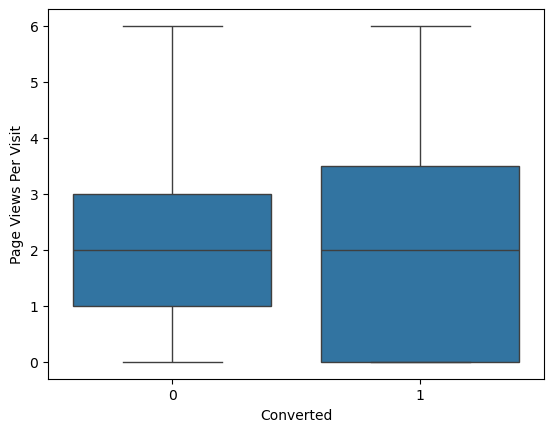

In [75]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead)

- We can not infer anything from above plotfor Page Views Per Visit .Only we can see median are same for converted and not coverted leades.

**Last Activity**

In [76]:
lead['Last Activity'].value_counts(normalize=True)

Last Activity
Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: proportion, dtype: float64

- We can group the less common activities(less than 0.5%) into a category called "Other_Activity".

In [77]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [78]:
lead['Last Activity'].value_counts(normalize=True)

Last Activity
Email Opened                 0.378223
SMS Sent                     0.299317
Olark Chat Conversation      0.107119
Page Visited on Website      0.070531
Converted to Lead            0.047168
Email Bounced                0.034384
Email Link Clicked           0.029425
Form Submitted on Website    0.012784
Unreachable                  0.009918
Unsubscribed                 0.006502
Other_Activity               0.004629
Name: proportion, dtype: float64

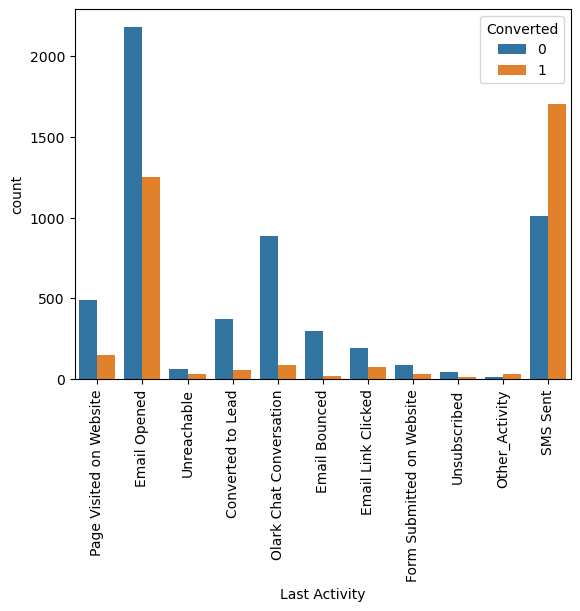

In [79]:
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- Most leads have "Email Opened" as their last activity. 
- The conversion rate for leads whose last activity is "SMS Sent" is high.

**Country**

<Axes: xlabel='Country', ylabel='count'>

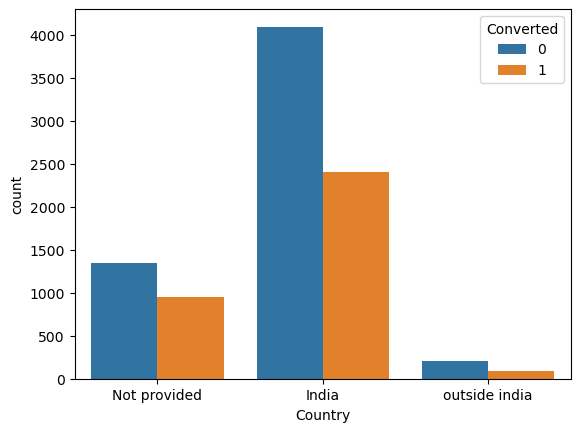

In [80]:
sns.countplot(x = "Country", hue = "Converted", data = lead)

- As we can see India has highest number of leads .
- Outside india  has very less number of leads.
- There are significant number of leads who didnot provide ther country name.
- no such inference can be drawn.

**Specialization**

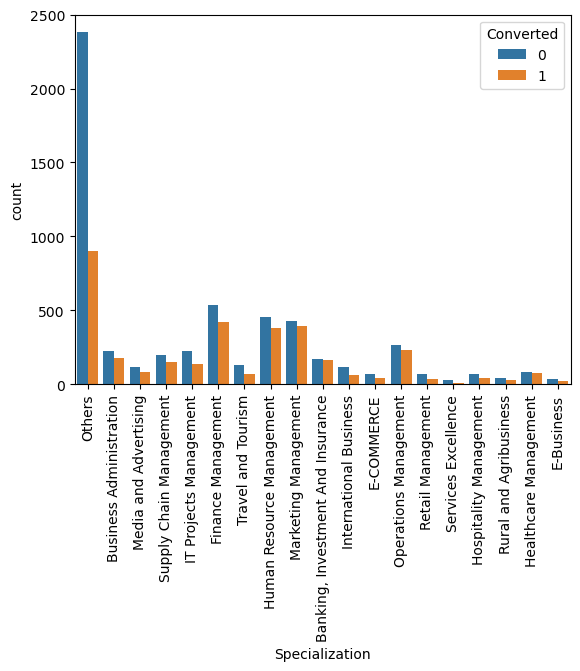

In [81]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- "Others"(who did not provide any specialization )category has highest number of leads.
- Human Resource Management, Marketing Management and Operations  Management  has high conversion rate.
- Health care  Management,Banking, Investment And Insurance has also  have high conversion rate but total number of leads are vary small.

**Tags**

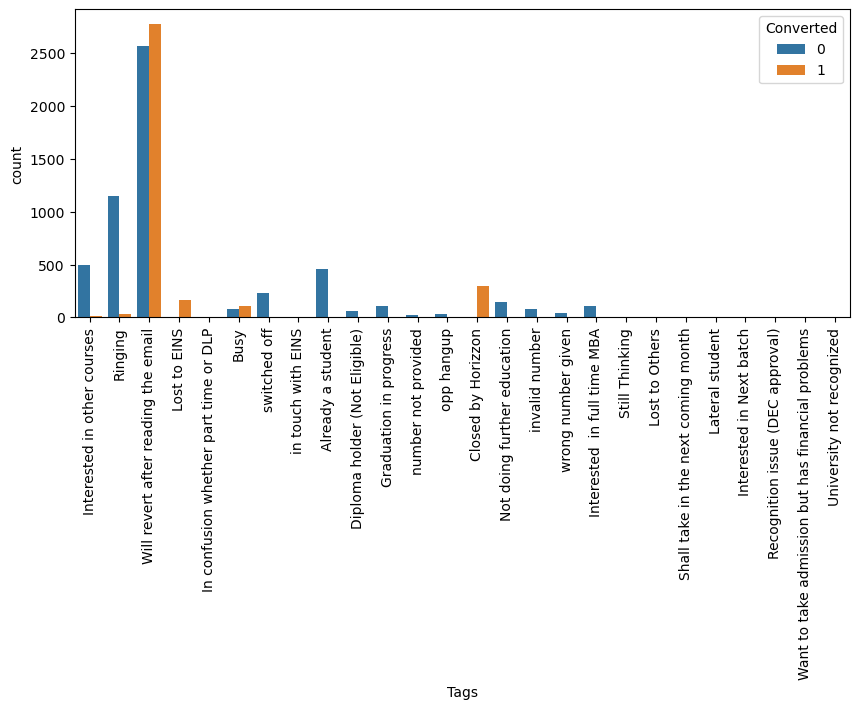

In [82]:
plt.figure(figsize=(10,4))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- "Will revet after reading the email"has highest number of lead and coversion rate.Although "Lost to EINS" and "Closed by Horizzon " also has very high conversion rate but number of leads are very less .
- According to data dictionary this column assigned to customers indicating the current status of the lead.

**A free copy of Mastering The Interview** 

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

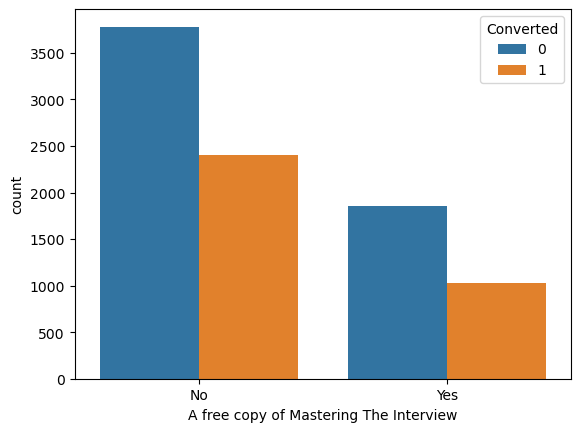

In [83]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)

- Less number of leads saying yes to "A free copy of Mastering The Interview".
- Conversion rate for both are almost same so can not draw any inference from this column.

In [84]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

**Last Notable Activity**

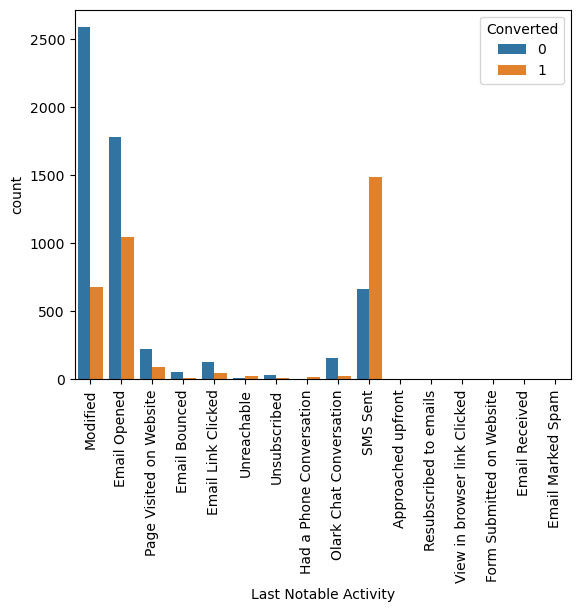

In [85]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

- "SMS Sent" category  has highest conversion rate.
- "Modified" and "Email Opened" has highest number of leads.

- Analysis shows that some columns do not contribute useful information to the model, so we can drop them for further analysis.

In [86]:
lead.shape

(9074, 17)

In [87]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [88]:
lead = lead.drop(['Tags','Country','Search','A free copy of Mastering The Interview'],axis=1)

In [89]:
lead.shape

(9074, 13)

In [90]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Last Notable Activity    

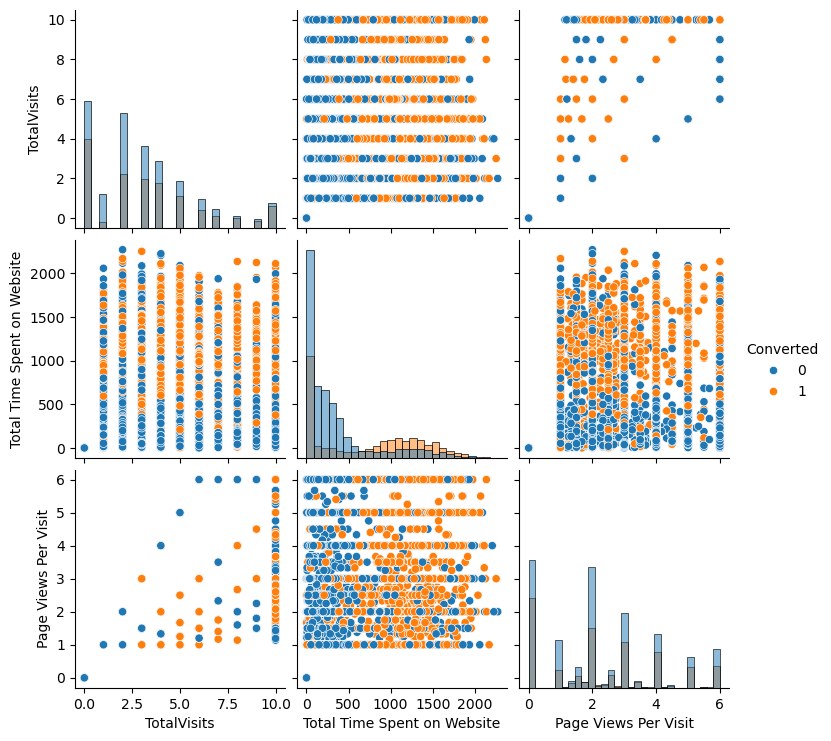

In [91]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(lead,diag_kind='hist',hue='Converted')
plt.show()

### Step-5 Data Preparation

##### Creating Dummy variables for the categorical features:

In [92]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)
dummy= dummy.astype(int)

In [93]:
#Checking
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [94]:
# Adding the results to the master dataframe lead
lead= pd.concat([lead,dummy], axis=1)
lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Last Notable Activity_Form Submitted on Website  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   
3  ...                                               0   
4  ...                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  

##### Dropping the repeated variables for which dummies are created

In [95]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity'], axis = 1)

In [96]:
lead.head()

Prospect ID Do Not Email Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620           No          No          0   
1  2a272436-5132-4136-86fa-dcc88c88f482           No          No          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a           No          No          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc           No          No          0   
4  3256f628-e534-4826-9d63-4a8b88782852           No          No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in

##### Converting some binary variables (Yes/No) to 1/0

In [97]:
vars = ['Do Not Email', 'Do Not Call']

lead[vars] = lead[vars].replace({'Yes': 1, 'No': 0})

In [98]:
lead.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Acti

Now we can see all the variables are numeric.

### Step 6: Splitting Test-Train Data

In [99]:
from sklearn.model_selection import train_test_split


In [100]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0           

In [101]:
# Putting target variable to y
y = lead['Converted']

In [102]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [215]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Let's check correlations** 

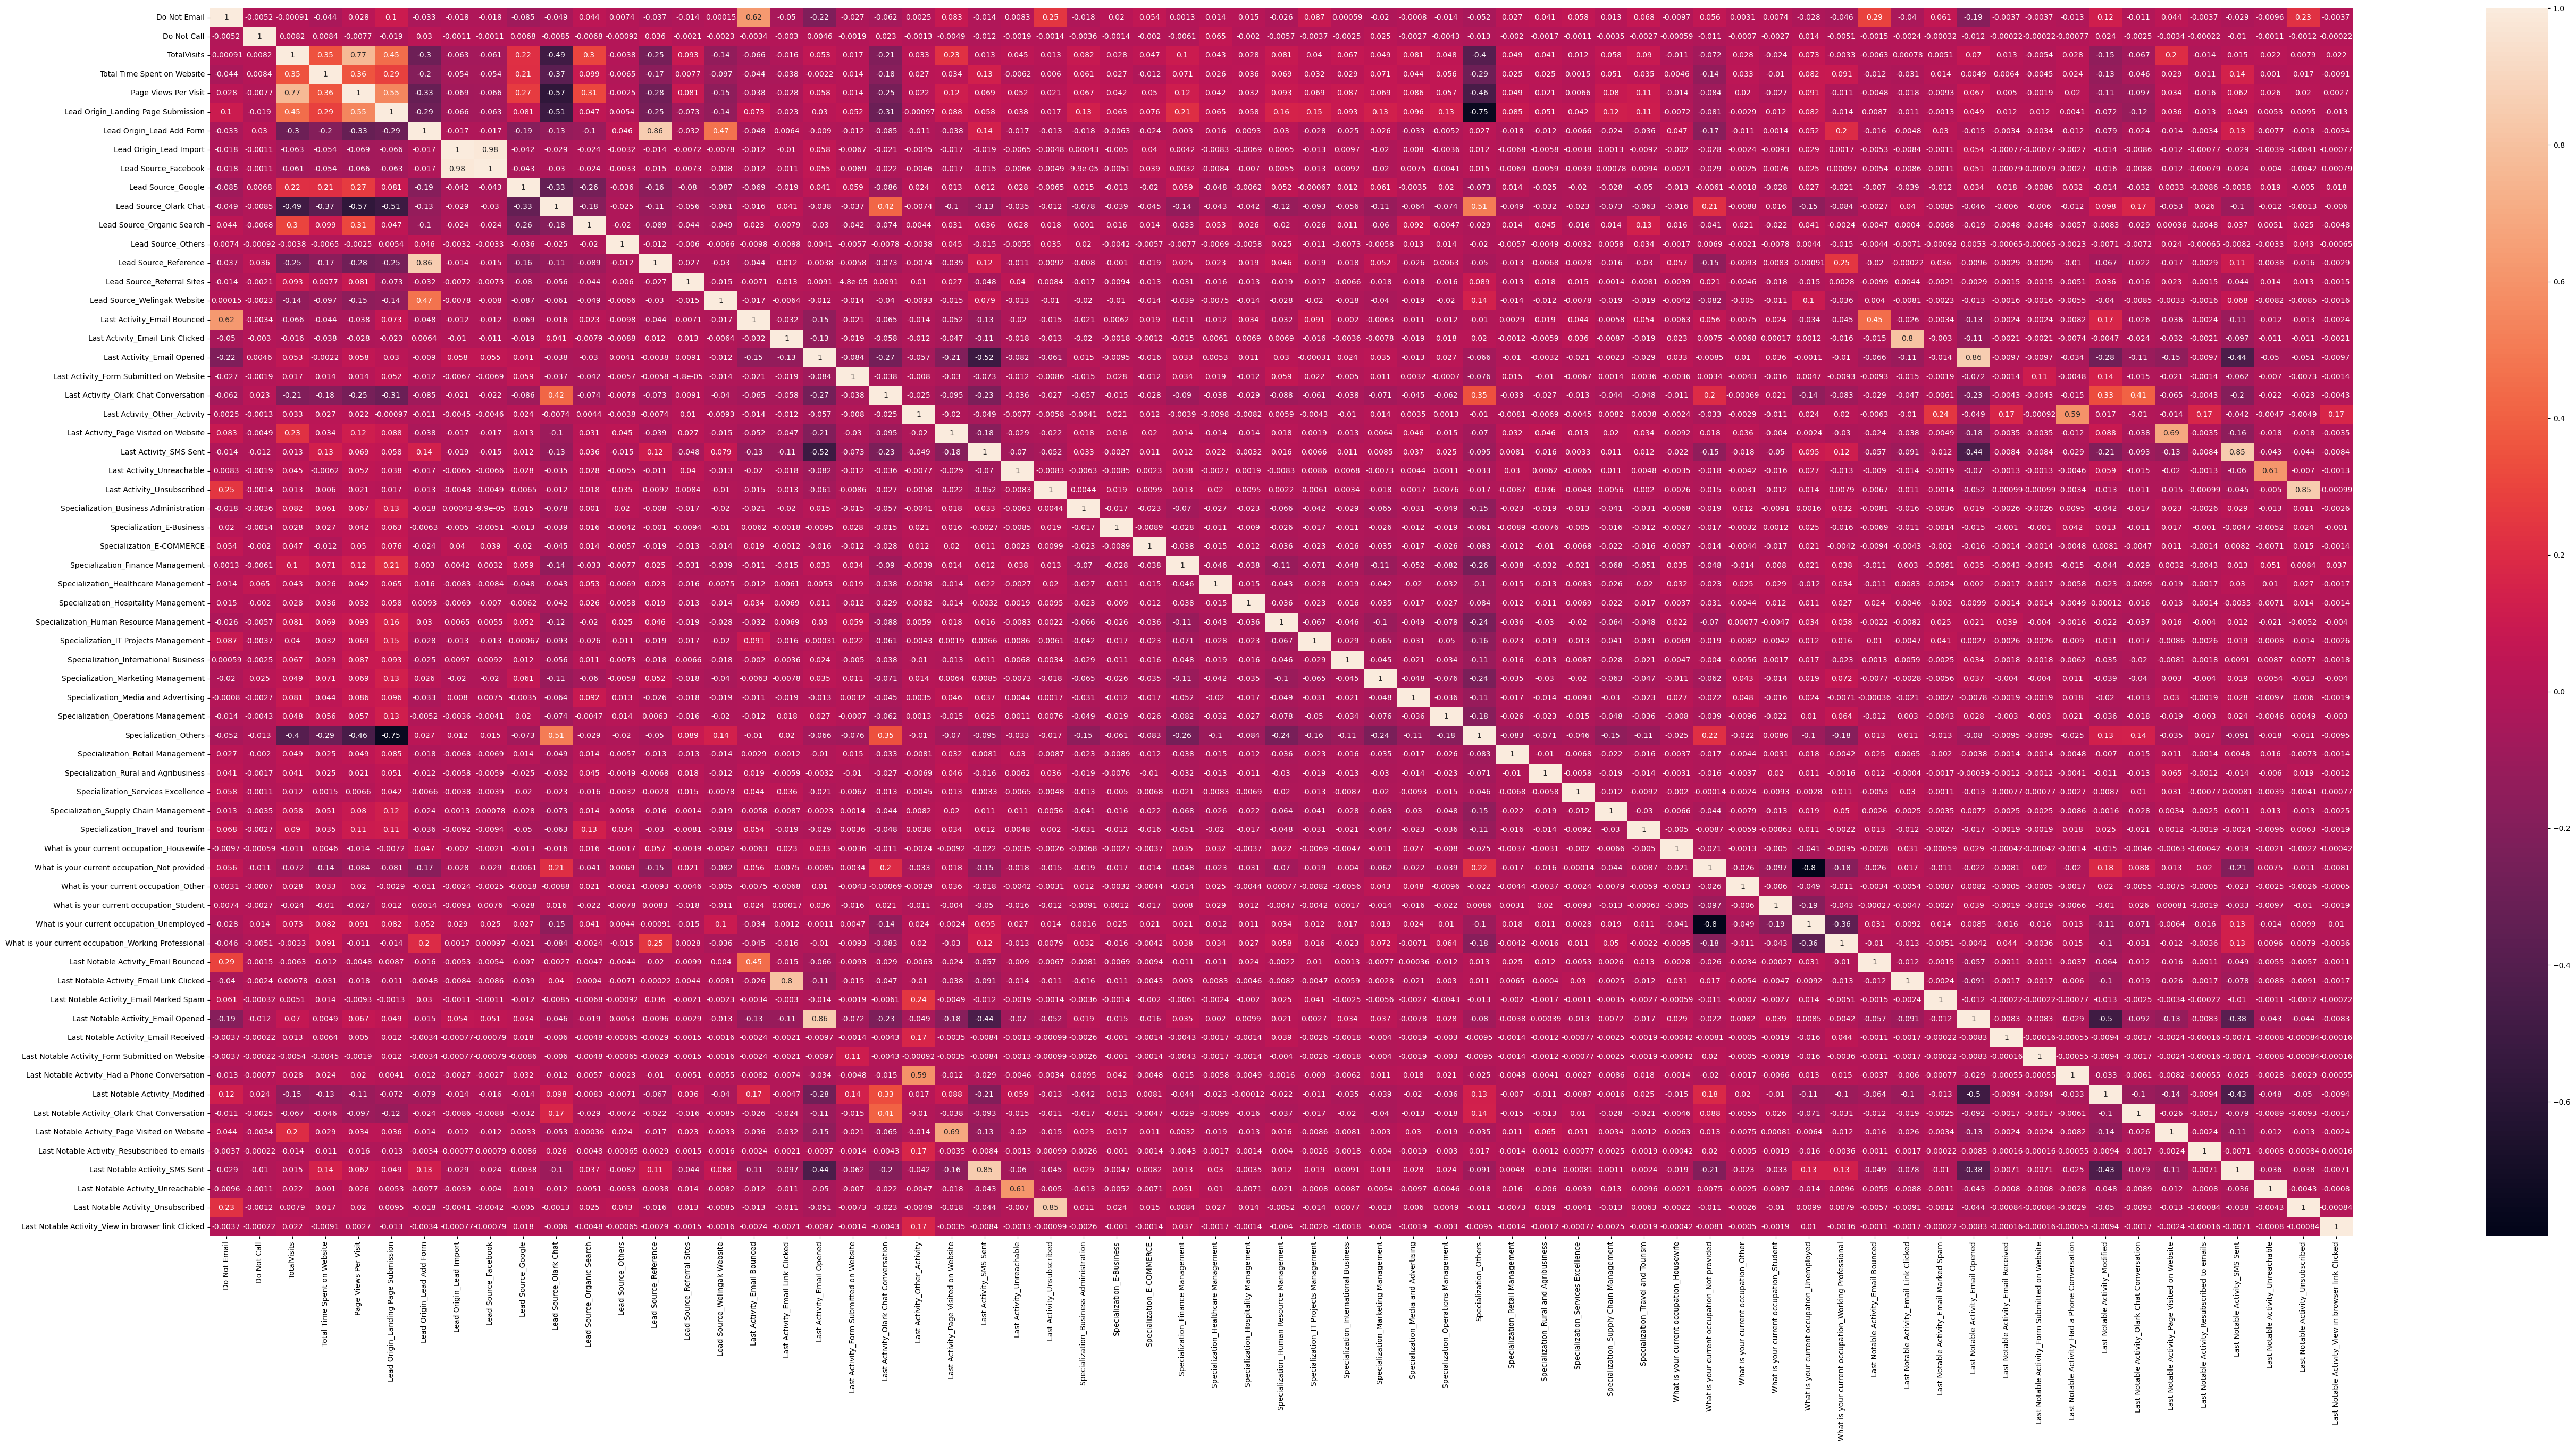

In [104]:
# Let's see the correlation matrix
plt.figure(figsize = (65,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

- As we can see, although the correlations are low, there are some variables that are highly correlated, whether positively or negatively.


### Step 7: Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                               0                                  0   

      Last Notable Activity_Unsubscribed  \
3009                                   0   
1

In [107]:
# Checking the Lead Conversion rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

- We have around 38% lead conversion rate.

### Step - 8 Model Building

### Feature Selection Using RFE

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [109]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [110]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False])

In [111]:
#selected columns are
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 32),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', True, 1),


In [112]:
# Columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [113]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Opera

### Assessing the model with StatsModels

**Model-1**

In [114]:
import statsmodels.api as sm

In [115]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2496.3
Date:                Tue, 24 Sep 2024   Deviance:                       4992.6
Time:                        21:44:04   Pearson chi2:                 6.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4213
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2022      0.165     -1.225      0.220      -0.526       0.121
Do Not Email                                            -1.5809      0.199     -7.960      0.000      -1.970      -1.192
Total Time Spent on Website                              1.1162      0.042     26.803      0.000       1.035       1.198
Lead Origin_Landing Page Submission                     -1.0104      0.130     -7.790      0.000      -1.265      -0.756
Lead Origin_Lead Add Form                                1.2758      0.890      1.433      0.152      -0.469       3.021
Lead Source_Olark Chat                                   1.1541      0.124      9.287      0.000       0.911       1.398
Lead Source_Reference                                    1.8202      0.914      1.992      0.046       0.029       3.611
Lead Source_Welingak Website                             4.2642      1.147      3.717      0.000       2.016       6.512
Last Activity_Email Opened                               0.9286      0.159      5.842      0.000       0.617       1.240
Last Activity_Other_Activity                             2.0192      0.548      3.686      0.000       0.946       3.093
Last Activity_SMS Sent                                   1.5339      0.117     13.078      0.000       1.304       1.764
Last Activity_Unsubscribed                               1.4944      0.493      3.031      0.002       0.528       2.461
Specialization_Others                                   -0.9473      0.127     -7.444      0.000      -1.197      -0.698
What is your current occupation_Housewife               22.5132   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Not provided            -1.1496      0.090    -12.708      0.000      -1.327      -0.972
What is your current occupation_Working Professional     2.3643      0.195     12.124      0.000       1.982       2.747
Last Notable Activity_Email Opened                      -0.7214      0.183     -3.934      0.000      -1.081      -0.362
Last Notable Activity_Had a Phone Conversation           1.4757      1.251      1.180      0.238      -0.976       3.927
Last Notable Activity_Modified                          -1.0327      0.115     -8.983      0.000      -1.258      -0.807
Last Notable Activity_Olark Chat Conversation           -0.9853      0.350     -2.812      0.005      -1.672      -0.299
Last Notable Activity_Unreachable                        1.9904      0.508      3.915      0.000       0.994       2.987
========================================================================================================================
"""

**Checking VIFs**

In [116]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                           Lead Origin_Lead Add Form  62.44
5                               Lead Source_Reference  48.10
6                        Lead Source_Welingak Website  15.50
15                 Last Notable Activity_Email Opened   7.75
7                          Last Activity_Email Opened   7.07
2                 Lead Origin_Landing Page Submission   3.82
11                              Specialization_Others   3.08
17                     Last Notable Activity_Modified   2.72
9                              Last Activity_SMS Sent   2.31
4                              Lead Source_Olark Chat   2.00
13       What is your current occupation_Not provided   1.64
8                        Last Activity_Other_Activity   1.56
16     Last Notable Activity_Had a Phone Conversation   1.55
1                         Total Time Spent on Website   1.31
0                                        Do Not Email   1.25
14  What is your current occupation_Working Profes...   1.21
18      Last Notable Activity_Olark Chat Conversation   1.16
10                         Last Activity_Unsubscribed   1.08
19                  Last Notable Activity_Unreachable   1.02
12          What is your current occupation_Housewife   1.01

- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form ' has the highest VIF. So let's start by dropping that.

In [118]:
cols = cols.drop('Lead Origin_Lead Add Form',1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

**Model-2**

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.4
Date:                Tue, 24 Sep 2024   Deviance:                       4994.9
Time:                        21:44:05   Pearson chi2:                 6.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4211
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1833      0.164     -1.115      0.265      -0.505       0.139
Do Not Email                                            -1.5829      0.199     -7.969      0.000      -1.972      -1.194
Total Time Spent on Website                              1.1146      0.042     26.800      0.000       1.033       1.196
Lead Origin_Landing Page Submission                     -1.0259      0.129     -7.931      0.000      -1.279      -0.772
Lead Source_Olark Chat                                   1.1480      0.124      9.256      0.000       0.905       1.391
Lead Source_Reference                                    3.0828      0.241     12.791      0.000       2.610       3.555
Lead Source_Welingak Website                             5.5318      0.730      7.573      0.000       4.100       6.964
Last Activity_Email Opened                               0.9319      0.159      5.865      0.000       0.620       1.243
Last Activity_Other_Activity                             2.0167      0.548      3.682      0.000       0.943       3.090
Last Activity_SMS Sent                                   1.5327      0.117     13.080      0.000       1.303       1.762
Last Activity_Unsubscribed                               1.4921      0.493      3.026      0.002       0.526       2.458
Specialization_Others                                   -0.9572      0.127     -7.531      0.000      -1.206      -0.708
What is your current occupation_Housewife               22.5106   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Not provided            -1.1519      0.090    -12.737      0.000      -1.329      -0.975
What is your current occupation_Working Professional     2.3611      0.195     12.105      0.000       1.979       2.743
Last Notable Activity_Email Opened                      -0.7273      0.183     -3.968      0.000      -1.087      -0.368
Last Notable Activity_Had a Phone Conversation           1.4730      1.251      1.177      0.239      -0.979       3.925
Last Notable Activity_Modified                          -1.0358      0.115     -9.016      0.000      -1.261      -0.811
Last Notable Activity_Olark Chat Conversation           -0.9895      0.350     -2.824      0.005      -1.676      -0.303
Last Notable Activity_Unreachable                        1.9855      0.508      3.905      0.000       0.989       2.982
========================================================================================================================
"""

**Checking VIF**

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14                 Last Notable Activity_Email Opened  7.75
6                          Last Activity_Email Opened  7.06
2                 Lead Origin_Landing Page Submission  3.82
10                              Specialization_Others  3.08
16                     Last Notable Activity_Modified  2.72
8                              Last Activity_SMS Sent  2.30
3                              Lead Source_Olark Chat  2.00
12       What is your current occupation_Not provided  1.64
7                        Last Activity_Other_Activity  1.56
15     Last Notable Activity_Had a Phone Conversation  1.55
4                               Lead Source_Reference  1.38
1                         Total Time Spent on Website  1.31
0                                        Do Not Email  1.25
13  What is your current occupation_Working Profes...  1.21
17      Last Notable Activity_Olark Chat Conversation  1.16
5                        Lead Source_Welingak Website  1.11
9                          Last Activity_Unsubscribed  1.08
18                  Last Notable Activity_Unreachable  1.02
11          What is your current occupation_Housewife  1.01

In [121]:
cols = cols.drop('Last Notable Activity_Email Opened',1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

**Model-3**

In [122]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.2
Date:                Tue, 24 Sep 2024   Deviance:                       5010.3
Time:                        21:44:05   Pearson chi2:                 6.14e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4197
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3791      0.158     -2.406      0.016      -0.688      -0.070
Do Not Email                                            -1.5606      0.198     -7.886      0.000      -1.949      -1.173
Total Time Spent on Website                              1.1185      0.042     26.920      0.000       1.037       1.200
Lead Origin_Landing Page Submission                     -1.0223      0.129     -7.908      0.000      -1.276      -0.769
Lead Source_Olark Chat                                   1.1594      0.124      9.354      0.000       0.916       1.402
Lead Source_Reference                                    3.1034      0.241     12.855      0.000       2.630       3.577
Lead Source_Welingak Website                             5.5427      0.731      7.583      0.000       4.110       6.975
Last Activity_Email Opened                               0.4709      0.112      4.223      0.000       0.252       0.689
Last Activity_Other_Activity                             1.9901      0.545      3.653      0.000       0.922       3.058
Last Activity_SMS Sent                                   1.6707      0.112     14.875      0.000       1.451       1.891
Last Activity_Unsubscribed                               1.6148      0.489      3.303      0.001       0.657       2.573
Specialization_Others                                   -0.9576      0.127     -7.534      0.000      -1.207      -0.709
What is your current occupation_Housewife               22.4653   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
What is your current occupation_Not provided            -1.1642      0.090    -12.905      0.000      -1.341      -0.987
What is your current occupation_Working Professional     2.3685      0.195     12.139      0.000       1.986       2.751
Last Notable Activity_Had a Phone Conversation           1.6971      1.249      1.359      0.174      -0.751       4.146
Last Notable Activity_Modified                          -0.7612      0.091     -8.336      0.000      -0.940      -0.582
Last Notable Activity_Olark Chat Conversation           -0.7975      0.348     -2.294      0.022      -1.479      -0.116
Last Notable Activity_Unreachable                        2.1833      0.507      4.307      0.000       1.190       3.177
========================================================================================================================
"""

**Let's now check the VIFs again**

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  3.42
10                              Specialization_Others  2.90
6                          Last Activity_Email Opened  2.37
8                              Last Activity_SMS Sent  2.21
3                              Lead Source_Olark Chat  1.99
15                     Last Notable Activity_Modified  1.92
12       What is your current occupation_Not provided  1.64
7                        Last Activity_Other_Activity  1.56
14     Last Notable Activity_Had a Phone Conversation  1.55
4                               Lead Source_Reference  1.36
1                         Total Time Spent on Website  1.31
0                                        Do Not Email  1.25
13  What is your current occupation_Working Profes...  1.21
16      Last Notable Activity_Olark Chat Conversation  1.14
5                        Lead Source_Welingak Website  1.11
9                          Last Activity_Unsubscribed  1.08
17                  Last Notable Activity_Unreachable  1.02
11          What is your current occupation_Housewife  1.01

- VIF Values looks Good but "What is your current occupation_Housewife" has high p value lets drop that column.

In [124]:
cols = cols.drop('What is your current occupation_Housewife',1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

**Model-4**

In [125]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.8
Date:                Tue, 24 Sep 2024   Deviance:                       5017.6
Time:                        21:44:06   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4190
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3741      0.157     -2.377      0.017      -0.683      -0.066
Do Not Email                                            -1.5622      0.198     -7.892      0.000      -1.950      -1.174
Total Time Spent on Website                              1.1177      0.042     26.928      0.000       1.036       1.199
Lead Origin_Landing Page Submission                     -1.0224      0.129     -7.915      0.000      -1.276      -0.769
Lead Source_Olark Chat                                   1.1582      0.124      9.346      0.000       0.915       1.401
Lead Source_Reference                                    3.1202      0.241     12.939      0.000       2.648       3.593
Lead Source_Welingak Website                             5.5419      0.731      7.582      0.000       4.109       6.975
Last Activity_Email Opened                               0.4739      0.111      4.255      0.000       0.256       0.692
Last Activity_Other_Activity                             1.9895      0.545      3.651      0.000       0.922       3.057
Last Activity_SMS Sent                                   1.6680      0.112     14.861      0.000       1.448       1.888
Last Activity_Unsubscribed                               1.6139      0.489      3.301      0.001       0.656       2.572
Specialization_Others                                   -0.9618      0.127     -7.571      0.000      -1.211      -0.713
What is your current occupation_Not provided            -1.1662      0.090    -12.932      0.000      -1.343      -0.989
What is your current occupation_Working Professional     2.3635      0.195     12.113      0.000       1.981       2.746
Last Notable Activity_Had a Phone Conversation           1.6932      1.249      1.355      0.175      -0.755       4.142
Last Notable Activity_Modified                          -0.7630      0.091     -8.363      0.000      -0.942      -0.584
Last Notable Activity_Olark Chat Conversation           -0.7976      0.348     -2.294      0.022      -1.479      -0.116
Last Notable Activity_Unreachable                        2.1806      0.507      4.302      0.000       1.187       3.174
========================================================================================================================
"""

**Let's now check the VIFs again**

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  3.42
10                              Specialization_Others  2.90
6                          Last Activity_Email Opened  2.36
8                              Last Activity_SMS Sent  2.21
3                              Lead Source_Olark Chat  1.99
14                     Last Notable Activity_Modified  1.92
11       What is your current occupation_Not provided  1.64
7                        Last Activity_Other_Activity  1.56
13     Last Notable Activity_Had a Phone Conversation  1.55
4                               Lead Source_Reference  1.36
1                         Total Time Spent on Website  1.31
0                                        Do Not Email  1.25
12  What is your current occupation_Working Profes...  1.21
15      Last Notable Activity_Olark Chat Conversation  1.14
5                        Lead Source_Welingak Website  1.11
9                          Last Activity_Unsubscribed  1.08
16                  Last Notable Activity_Unreachable  1.02

- As we can see VIF values looks right but p value for "Last Notable Activity_Had a Phone Conversation" is high lets drop it.

In [127]:
cols = cols.drop('Last Notable Activity_Had a Phone Conversation',1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

**Model-5**

In [128]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2509.9
Date:                Tue, 24 Sep 2024   Deviance:                       5019.8
Time:                        21:44:07   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4188
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3645      0.157     -2.318      0.020      -0.673      -0.056
Do Not Email                                            -1.5673      0.198     -7.911      0.000      -1.956      -1.179
Total Time Spent on Website                              1.1164      0.041     26.912      0.000       1.035       1.198
Lead Origin_Landing Page Submission                     -1.0232      0.129     -7.924      0.000      -1.276      -0.770
Lead Source_Olark Chat                                   1.1553      0.124      9.323      0.000       0.912       1.398
Lead Source_Reference                                    3.1188      0.241     12.931      0.000       2.646       3.591
Lead Source_Welingak Website                             5.5445      0.731      7.585      0.000       4.112       6.977
Last Activity_Email Opened                               0.4680      0.111      4.205      0.000       0.250       0.686
Last Activity_Other_Activity                             2.4126      0.475      5.080      0.000       1.482       3.343
Last Activity_SMS Sent                                   1.6626      0.112     14.824      0.000       1.443       1.882
Last Activity_Unsubscribed                               1.6132      0.489      3.299      0.001       0.655       2.571
Specialization_Others                                   -0.9667      0.127     -7.610      0.000      -1.216      -0.718
What is your current occupation_Not provided            -1.1635      0.090    -12.909      0.000      -1.340      -0.987
What is your current occupation_Working Professional     2.3593      0.195     12.096      0.000       1.977       2.742
Last Notable Activity_Modified                          -0.7720      0.091     -8.477      0.000      -0.951      -0.594
Last Notable Activity_Olark Chat Conversation           -0.8024      0.348     -2.309      0.021      -1.484      -0.121
Last Notable Activity_Unreachable                        2.1719      0.507      4.286      0.000       1.179       3.165
========================================================================================================================
"""

- AS we can see all the values for p lies under 0.05 which is very good.

**Let's now check the VIFs again**

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  3.42
10                              Specialization_Others  2.90
6                          Last Activity_Email Opened  2.36
8                              Last Activity_SMS Sent  2.21
3                              Lead Source_Olark Chat  1.99
13                     Last Notable Activity_Modified  1.92
11       What is your current occupation_Not provided  1.63
4                               Lead Source_Reference  1.36
1                         Total Time Spent on Website  1.31
0                                        Do Not Email  1.25
12  What is your current occupation_Working Profes...  1.21
14      Last Notable Activity_Olark Chat Conversation  1.14
5                        Lead Source_Welingak Website  1.11
9                          Last Activity_Unsubscribed  1.08
7                        Last Activity_Other_Activity  1.02
15                  Last Notable Activity_Unreachable  1.02

- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [130]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

- We have 16 variables in our final model.

**Lets make Prediction on the Train set**

In [131]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.094314
1012    0.102906
9226    0.431087
4750    0.720290
7987    0.852605
1281    0.785543
2880    0.044488
4971    0.968428
7536    0.894699
1248    0.828777
dtype: float64

In [132]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09431403, 0.10290594, 0.43108656, 0.72029044, 0.85260471,
       0.78554323, 0.04448835, 0.9684281 , 0.89469905, 0.8287766 ])

**Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [133]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.094314         3009
1          0        0.102906         1012
2          0        0.431087         9226
3          1        0.720290         4750
4          1        0.852605         7987

Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels.

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
#Lets Check
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          0        0.094314         3009          0
1          0        0.102906         1012          0
2          0        0.431087         9226          0
3          1        0.720290         4750          1
4          1        0.852605         7987          1

**Let's make the Confusion matrix**

In [135]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3468  437]
 [ 705 1741]]


In [136]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3468      437
# converted            705      1741 

In [137]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8201857975122028


**Metrics beyond simply accuracy**

In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
s=TP / float(TP+FN)
print("sensitivity:",s)

sensitivity: 0.7117743254292723


In [140]:
# Let's see the sensitivity of our logistic regression model
sp=TN / float(TN+FP)
print("Specificity :",sp)

Specificity : 0.8880921895006402


In [141]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
f=FP/ float(TN+FP)
print("False Positive Rate:",f)

False Positive Rate: 0.1119078104993598


In [142]:
# Let's see the positive predictive value 
pp=TP / float(TP+FP)
print("Positive Predictive Value :",pp)

Positive Predictive Value : 0.7993572084481175


In [143]:
#Let's see the Negative predictive value
nv=TN / float(TN+ FN)
print ("Negative predictive value :",nv)

Negative predictive value : 0.8310567936736161


- We observed that our specificity was quite good at around 89%, but our sensitivity was only 71%.
- As we know sensitivity measures the proportion of true positives correctly identified. Ideally, you want it to be as high as possible.
- The sensitivity of 71% primarily resulted from the cut-off point of 0.5 that we had chosen arbitrarily. To improve sensitivity, we need to optimize this cut-off point, and we will achieve this by using the ROC curve..

### Step-9 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

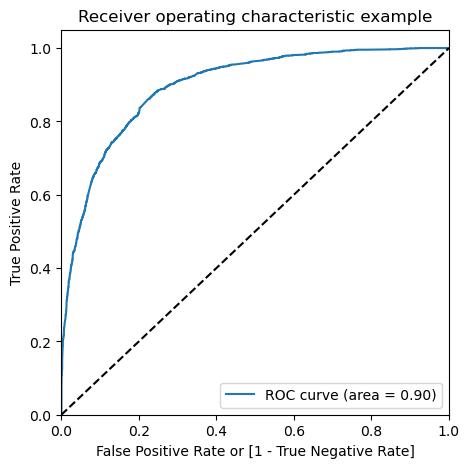

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- As we can see,we have a high area under the ROC curve (0.90), it indicates that our model performs well.

**Finding Optimal Cutoff Point**

- Previously, we selected an arbitrary cut-off value of 0.5. Now, we need to find the optimal cut-off value, which is the probability that provides a balance between sensitivity and specificity. The following section will address this determination.

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.094314         3009          0    1    0    0    0    0   
1          0        0.102906         1012          0    1    1    0    0    0   
2          0        0.431087         9226          0    1    1    1    1    1   
3          1        0.720290         4750          1    1    1    1    1    1   
4          1        0.852605         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    1    1    1    1    0

In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.644938  0.973426  0.439181
0.2   0.2  0.767753  0.917825  0.673752
0.3   0.3  0.804440  0.873671  0.761076
0.4   0.4  0.814990  0.781276  0.836108
0.5   0.5  0.820186  0.711774  0.888092
0.6   0.6  0.813415  0.643091  0.920102
0.7   0.7  0.788537  0.538839  0.944942
0.8   0.8  0.766808  0.448487  0.966197
0.9   0.9  0.726500  0.311529  0.986428


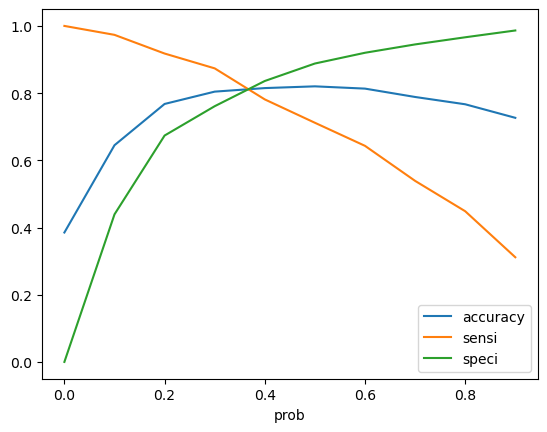

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


- From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.094314         3009          0    1    0    0    0    0   
1          0        0.102906         1012          0    1    1    0    0    0   
2          0        0.431087         9226          0    1    1    1    1    1   
3          1        0.720290         4750          1    1    1    1    1    1   
4          1        0.852605         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                1  
3    1    1    1    0    0                1  
4    1    1    1    1    0                1

**Assigning Lead Score to the Training data(between 0 and 100 to each of the leads which can be used by the company to target potential leads)**

In [151]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head(10)

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.094314         3009          0    1    0    0    0    0   
1          0        0.102906         1012          0    1    1    0    0    0   
2          0        0.431087         9226          0    1    1    1    1    1   
3          1        0.720290         4750          1    1    1    1    1    1   
4          1        0.852605         7987          1    1    1    1    1    1   
5          1        0.785543         1281          1    1    1    1    1    1   
6          0        0.044488         2880          0    1    0    0    0    0   
7          1        0.968428         4971          1    1    1    1    1    1   
8          1        0.894699         7536          1    1    1    1    1    1   
9          0        0.828777         1248          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0           9  
1    0    0    0    0    0                0          10  
2    0    0    0    0    0                1          43  
3    1    1    1    0    0                1          72  
4    1    1    1    1    0                1          85  
5    1    1    1    0    0                1          79  
6    0    0    0    0    0                0           4  
7    1    1    1    1    1                1          97  
8    1    1    1    1    0                1          89  
9    1    1    1    1    0                1          83

### Step- 10 Model Evaluation

In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.814989765391277

In [153]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3265,  640],
       [ 535, 1911]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
s=TP / float(TP+FN)
print("sensitivity:",s)

sensitivity: 0.7812755519215046


In [156]:
# Let's see the sensitivity of our logistic regression model
sp=TN / float(TN+FP)
print("Specificity :",sp)

Specificity : 0.8361075544174136


In [157]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
f=FP/ float(TN+FP)
print("False Positive Rate:",f)

False Positive Rate: 0.16389244558258642


In [158]:
# Let's see the positive predictive value 
pp=TP / float(TP+FP)
print("Positive Predictive Value :",pp)

Positive Predictive Value : 0.7491179929439435


In [159]:
#Let's see the Negative predictive value
nv=TN / float(TN+ FN)
print ("Negative predictive value :",nv)

Negative predictive value : 0.8592105263157894


### Step - 11 Precision and Recall

- Precision (Positive Predictive Value): This metric reflects the percentage of predicted positive results that are actually relevant.
- Recall (Sensitivity): This metric indicates the percentage of actual relevant results that the algorithm successfully identifies.

In [160]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3468,  437],
       [ 705, 1741]], dtype=int64)

**Precision**

In [161]:
TP / TP + FP

641.0

In [162]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7993572084481175

**Recall**

In [163]:
TP / TP + FN

536.0

In [164]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7117743254292723

In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7993572084481175

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7117743254292723

### Precision and recall tradeoff

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

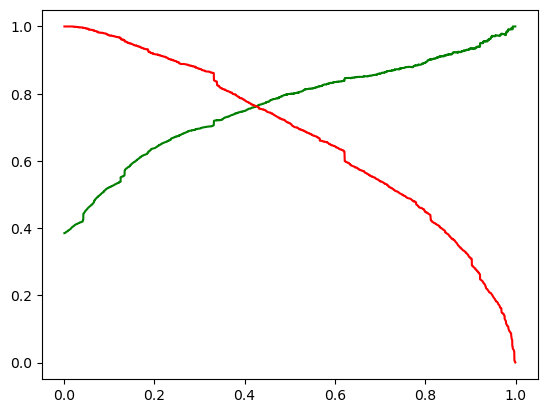

In [171]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- This plot helps us to understand the relationship between precision and the threshold, allowing us to identify the optimal points.

- In Precision and recall plot 0.4 looks opimal.

### Step-12  Making predictions on the test set

Let's now make predicitons on the test set.

In [172]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
    

In [173]:
# Select the columns choosen by the final model to X_test.
X_test = X_test[cols]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3271             0                    -0.600595   
1490             0                     1.887326   
7936             0                    -0.752879   
4216             0                    -0.888650   
3830             0                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
3271                                    0                       0   
1490                                    1                       0   
7936                                    0                       0   
4216                                    0                       0   
3830                                    1                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3271                      0                             0   
1490                      0                             0   
7936                      0                             0   
4216                      1                             0   
3830                      0                             0   

      Last Activity_Email Opened  Last Activity_Other_Activity  \
3271                           1                             0   
1490                           1                             0   
7936                           1                             0   
4216                           1                             0   
3830                           1                             0   

      Last Activity_SMS Sent  Last Activity_Unsubscribed  \
3271                       0                           0   
1490                       0                           0   
7936                       0                           0   
4216                       0                           0   
3830                       0                           0   

      Specialization_Others  What is your current occupation_Not provided  \
3271                      1                                             1   
1490                      0                                             0   
7936                      1                                             1   
4216                      0                                             0   
3830                      0                                             1   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Unreachable  
3271                                  0  
1490                                  0  
7936                                  0  
4216                                  0  
3830                                  0

In [174]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [175]:
# Check X_test_sm

X_test_sm

const  Do Not Email  Total Time Spent on Website  \
3271    1.0             0                    -0.600595   
1490    1.0             0                     1.887326   
7936    1.0             0                    -0.752879   
4216    1.0             0                    -0.888650   
3830    1.0             0                    -0.587751   
...     ...           ...                          ...   
850     1.0             0                     0.632357   
2879    1.0             0                     0.192017   
6501    1.0             0                     1.560740   
7155    1.0             0                     0.056246   
376     1.0             0                    -0.206123   

      Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
3271                                    0                       0   
1490                                    1                       0   
7936                                    0                       0   
4216                                    0                       0   
3830                                    1                       0   
...                                   ...                     ...   
850                                     1                       0   
2879                                    1                       0   
6501                                    1                       0   
7155                                    1                       0   
376                                     1                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3271                      0                             0   
1490                      0                             0   
7936                      0                             0   
4216                      1                             0   
3830                      0                             0   
...                     ...                           ...   
850                       0                             0   
2879                      0                             0   
6501                      0                             0   
7155                      0                             0   
376                       0                             0   

      Last Activity_Email Opened  Last Activity_Other_Activity  \
3271                           1                             0   
1490                           1                             0   
7936                           1                             0   
4216                           1                             0   
3830                           1                             0   
...                          ...                           ...   
850                            0                             0   
2879                           0                             0   
6501                           0                             0   
7155                           1                             0   
376                            0                             0   

      Last Activity_SMS Sent  Last Activity_Unsubscribed  \
3271                       0                           0   
1490                       0                           0   
7936                       0                           0   
4216                       0                           0   
3830                       0                           0   
...                      ...                         ...   
850                        0                           0   
2879                       0                           0   
6501                       1                           0   
7155                       0                           0   
376                        0                           0   

      Specialization_Others  What is your current occupation_Not provided  \
3271                      1                                             1   
1490                      0                                             0   
79

In [176]:
# Making predictions on the test set,store it in the variable 'y_test_pred'

y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.063140
1490    0.971984
7936    0.053800
4216    0.811252
3830    0.060694
1800    0.646397
6507    0.388654
4821    0.374057
4223    0.921146
4714    0.191408
dtype: float64

In [177]:
# Converting y_test_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

0
3271  0.063140
1490  0.971984
7936  0.053800
4216  0.811252
3830  0.060694

In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
# Check 'y_pred_final'

y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.063140
1          1         1490  0.971984
2          0         7936  0.053800
3          1         4216  0.811252
4          0         3830  0.060694

In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [185]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [186]:
# Let's see  y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         3271          0        0.063140
1         1490          1        0.971984
2         7936          0        0.053800
3         4216          1        0.811252
4         3830          0        0.060694

In [187]:
# Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.40 else 0)

In [188]:
# Let's see  y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.063140                0
1         1490          1        0.971984                1
2         7936          0        0.053800                0
3         4216          1        0.811252                1
4         3830          0        0.060694                0

In [189]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8130738156445098

In [190]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1451,  283],
       [ 226,  763]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [192]:
# Let's see the sensitivity of our logistic regression model
s=TP / float(TP+FN)
print("Sensitivity:",s)

Sensitivity: 0.7714863498483316


In [203]:
# Let's see the sensitivity of our logistic regression model
sp=TN / float(TN+FP)
print("Specificity :",sp)

Specificity : 0.8367935409457901


- Assigning Lead Score to the Test data

In [204]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
0         3271          0        0.063140                0           6
1         1490          1        0.971984                1          97
2         7936          0        0.053800                0           5
3         4216          1        0.811252                1          81
4         3830          0        0.060694                0           6

Finding out the leads which should be contacted:

In [214]:
hot_lead=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_lead

Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
1            1490          1        0.971984                1          97
8            4223          1        0.921146                1          92
16           1946          1        0.932307                1          93
21           2461          1        0.992489                1          99
23           5822          1        0.996933                1         100
...           ...        ...             ...              ...         ...
2686         8052          1        0.996933                1         100
2694         1566          1        0.952095                1          95
2699         6461          1        0.964376                1          96
2715         6299          1        0.903032                1          90
2720         6501          1        0.882591                1          88

[389 rows x 5 columns]

- There are 389 leads available for contact that have a strong likelihood of converting with lead score greater than 85
.

In [213]:
#Important variables
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.544536
Lead Source_Reference                                   3.118756
Last Activity_Other_Activity                            2.412615
What is your current occupation_Working Professional    2.359319
Last Notable Activity_Unreachable                       2.171883
Last Activity_SMS Sent                                  1.662575
Last Activity_Unsubscribed                              1.613170
Lead Source_Olark Chat                                  1.155344
Total Time Spent on Website                             1.116357
Last Activity_Email Opened                              0.468026
const                                                  -0.364533
Last Notable Activity_Modified                         -0.772031
Last Notable Activity_Olark Chat Conversation          -0.802380
Specialization_Others                                  -0.966724
Lead Origin_Landing Page Submission                    -1.023188
What is your current occu

###  Conclusion 

 In this lead scoring case study, we successfully developed a logistic regression model to predict lead conversion rates. The model demonstrated strong performance, achieving an accuracy of 81.49% on the training data and 81.30% on the test data. With a sensitivity of 78.42% and specificity of 83.61% in training, and a sensitivity of 77.12% and specificity of 83.67% in testing, the model effectively balances true positive and true negative rates. Additionally, it achieved a precision of 79.9% and a recall of 71.1%, indicating reliable predictions.The model is also flexible and can adapt to future changes as new data comes in. Overall, we targeted a lead conversion rate of around 80%, giving the CEO confidence to make informed decisions for improving conversions.